In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
data_dir="Data"

In [3]:
img_height, img_width = 180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode="categorical",
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 720 files belonging to 6 classes.
Using 576 files for training.


2022-12-16 20:06:07.577183: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode="categorical",
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 720 files belonging to 6 classes.
Using 144 files for validation.


In [5]:
class_names = train_ds.class_names
class_names

['Cricket Field', 'Forest Land', 'Grass', 'Hard Sand', 'Road', 'Tiles']

In [6]:
xception_model = Sequential()

pretrained_model = tf.keras.applications.Xception(include_top=False,weights="imagenet",
                                                  input_shape=(180,180,3),pooling="avg",
                                                  classes=6)
for layer in pretrained_model.layers:
    layer.trainable=False
    
xception_model.add(pretrained_model)
xception_model.add(Flatten())
xception_model.add(Dense(512,activation="relu"))
xception_model.add(Dense(6,activation="softmax"))                                         

In [7]:
xception_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 6)                3078      
 pper)                                                           
                                                                 
Total params: 21,913,646
Trainable params: 1,052,166
Non-trainable params: 20,861,480
____________________________________

In [8]:
xception_model.compile(optimizer=Adam(learning_rate=0.001),loss=tf.losses.BinaryCrossentropy(),
                     metrics=["accuracy"])

In [9]:
epochs=10
history = xception_model.fit(train_ds,
                           validation_data = val_ds,
                           epochs=epochs)

Epoch 1/10
18/18 [==============================] - 91s 5s/step - loss: 4.7210 - accuracy: 0.5938 - val_loss: 1.6379 - val_accuracy: 0.6875
Epoch 2/10
18/18 [==============================] - 81s 4s/step - loss: 1.4743 - accuracy: 0.7413 - val_loss: 1.0526 - val_accuracy: 0.7292
Epoch 3/10
18/18 [==============================] - 68s 4s/step - loss: 0.5311 - accuracy: 0.8333 - val_loss: 0.2498 - val_accuracy: 0.8542
Epoch 4/10
18/18 [==============================] - 69s 4s/step - loss: 0.2359 - accuracy: 0.8698 - val_loss: 0.5133 - val_accuracy: 0.7708
Epoch 5/10
18/18 [==============================] - 68s 4s/step - loss: 0.3665 - accuracy: 0.8663 - val_loss: 0.2253 - val_accuracy: 0.8958
Epoch 6/10
18/18 [==============================] - 60s 3s/step - loss: 0.1703 - accuracy: 0.9080 - val_loss: 0.1936 - val_accuracy: 0.8819
Epoch 7/10
18/18 [==============================] - 57s 3s/step - loss: 0.1067 - accuracy: 0.9236 - val_loss: 0.1698 - val_accuracy: 0.8819
Epoch 8/10
18/18 [==

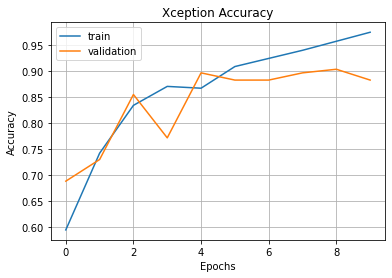

In [10]:
fig1 = plt.gcf()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.grid()
plt.title("Xception Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train","validation"])
plt.savefig("xception-accuracy.png")
plt.show()


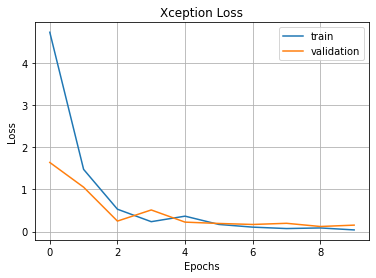

In [11]:
fig1 = plt.gcf()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.title("Xception Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train","validation"])
plt.savefig("xception-loss.png")
plt.show()



In [12]:
np.mean(history.history["accuracy"])

0.8605902671813965